In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
import sys
!{sys.executable} -m pip install citipy

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [15]:
import requests

# Import the API key.
from config import weather_api_key

In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | ponta do sol
Processing Record 2 of Set 13 | nikolskoye
Processing Record 3 of Set 13 | rikitea
Processing Record 4 of Set 13 | qaanaaq
Processing Record 5 of Set 13 | kaitangata
Processing Record 6 of Set 13 | upernavik
Processing Record 7 of Set 13 | vardo
Processing Record 8 of Set 13 | mayo
Processing Record 9 of Set 13 | yekaterinoslavka
Processing Record 10 of Set 13 | norman wells
Processing Record 11 of Set 13 | severo-kurilsk
Processing Record 12 of Set 13 | provideniya
Processing Record 13 of Set 13 | puerto ayora
Processing Record 14 of Set 13 | castro
Processing Record 15 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 13 | khovu-aksy
Processing Record 17 of Set 13 | bredasdorp
Processing Record 18 of Set 13 | honningsvag
Processing Record 19 of Set 13 | skibbereen
Processing Record 20 of Set 13 | jamestown
Processing Record 21 of Set 13 | vaini
Processing Record 22 of Set 13 | saint-joseph
Processing Record 23 o

Processing Record 33 of Set 16 | georgetown
Processing Record 34 of Set 16 | yeniseysk
Processing Record 35 of Set 16 | isiolo
Processing Record 36 of Set 16 | yumen
Processing Record 37 of Set 16 | walvis bay
Processing Record 38 of Set 16 | bougouni
Processing Record 39 of Set 16 | aklavik
Processing Record 40 of Set 16 | fuerte olimpo
Processing Record 41 of Set 16 | emerald
Processing Record 42 of Set 16 | hithadhoo
Processing Record 43 of Set 16 | saurimo
Processing Record 44 of Set 16 | willmar
Processing Record 45 of Set 16 | sawtell
Processing Record 46 of Set 16 | kaniama
Processing Record 47 of Set 16 | masterton
Processing Record 48 of Set 16 | balikpapan
Processing Record 49 of Set 16 | katsuura
Processing Record 50 of Set 16 | mehamn
Processing Record 1 of Set 17 | barbar
City not found. Skipping...
Processing Record 2 of Set 17 | sterling
Processing Record 3 of Set 17 | fortuna
Processing Record 4 of Set 17 | laguna
Processing Record 5 of Set 17 | awjilah
Processing Recor

Processing Record 18 of Set 20 | alofi
Processing Record 19 of Set 20 | dvinskoy
Processing Record 20 of Set 20 | prince rupert
Processing Record 21 of Set 20 | great yarmouth
Processing Record 22 of Set 20 | yulara
Processing Record 23 of Set 20 | gornopravdinsk
Processing Record 24 of Set 20 | pisco
Processing Record 25 of Set 20 | esperance
Processing Record 26 of Set 20 | temaraia
City not found. Skipping...
Processing Record 27 of Set 20 | igarka
Processing Record 28 of Set 20 | okhotsk
Processing Record 29 of Set 20 | songjianghe
Processing Record 30 of Set 20 | isabela
Processing Record 31 of Set 20 | kiunga
Processing Record 32 of Set 20 | naze
Processing Record 33 of Set 20 | santa fe
Processing Record 34 of Set 20 | moron
Processing Record 35 of Set 20 | andenes
Processing Record 36 of Set 20 | humboldt
Processing Record 37 of Set 20 | benjamin hill
Processing Record 38 of Set 20 | vysokogornyy
Processing Record 39 of Set 20 | papar
Processing Record 40 of Set 20 | dryden
Pro

Processing Record 3 of Set 24 | singaperumalkoil
City not found. Skipping...
Processing Record 4 of Set 24 | makhinjauri
Processing Record 5 of Set 24 | esso
Processing Record 6 of Set 24 | killybegs
Processing Record 7 of Set 24 | isangel
Processing Record 8 of Set 24 | grand gaube
Processing Record 9 of Set 24 | brigham city
Processing Record 10 of Set 24 | strezhevoy
Processing Record 11 of Set 24 | vanavara
Processing Record 12 of Set 24 | hopelchen
Processing Record 13 of Set 24 | tezu
Processing Record 14 of Set 24 | curuca
Processing Record 15 of Set 24 | turangi
Processing Record 16 of Set 24 | beipiao
Processing Record 17 of Set 24 | chichihualco
Processing Record 18 of Set 24 | aykhal
Processing Record 19 of Set 24 | dolinsk
Processing Record 20 of Set 24 | meulaboh
Processing Record 21 of Set 24 | antsohihy
Processing Record 22 of Set 24 | meadow lake
Processing Record 23 of Set 24 | nalut
Processing Record 24 of Set 24 | krasnoselkup
Processing Record 25 of Set 24 | mrirt
C

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,79.72,66,9,5.10,PT,2021-09-27 14:41:54
1,Nikolskoye,59.7035,30.7861,55.29,81,12,5.26,RU,2021-09-27 14:41:25
2,Rikitea,-23.1203,-134.9692,73.31,70,4,21.77,PF,2021-09-27 14:41:22
3,Qaanaaq,77.4840,-69.3632,24.73,66,100,5.70,GL,2021-09-27 14:41:58
4,Kaitangata,-46.2817,169.8464,39.92,84,9,5.79,NZ,2021-09-27 14:42:42
5,Upernavik,72.7868,-56.1549,26.33,58,14,3.85,GL,2021-09-27 14:41:20
6,Vardo,70.3705,31.1107,56.95,76,0,12.66,NO,2021-09-27 14:41:53
7,Mayo,38.8876,-76.5119,76.35,61,1,4.00,US,2021-09-27 14:45:07
8,Yekaterinoslavka,50.3734,129.1139,47.68,75,0,6.64,RU,2021-09-27 14:45:07
9,Norman Wells,65.2820,-126.8329,30.24,86,90,4.61,CA,2021-09-27 14:42:03


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2021-09-27 14:41:54,32.6667,-17.1000,79.72,66,9,5.10
1,Nikolskoye,RU,2021-09-27 14:41:25,59.7035,30.7861,55.29,81,12,5.26
2,Rikitea,PF,2021-09-27 14:41:22,-23.1203,-134.9692,73.31,70,4,21.77
3,Qaanaaq,GL,2021-09-27 14:41:58,77.4840,-69.3632,24.73,66,100,5.70
4,Kaitangata,NZ,2021-09-27 14:42:42,-46.2817,169.8464,39.92,84,9,5.79
5,Upernavik,GL,2021-09-27 14:41:20,72.7868,-56.1549,26.33,58,14,3.85
6,Vardo,NO,2021-09-27 14:41:53,70.3705,31.1107,56.95,76,0,12.66
7,Mayo,US,2021-09-27 14:45:07,38.8876,-76.5119,76.35,61,1,4.00
8,Yekaterinoslavka,RU,2021-09-27 14:45:07,50.3734,129.1139,47.68,75,0,6.64
9,Norman Wells,CA,2021-09-27 14:42:03,65.2820,-126.8329,30.24,86,90,4.61


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

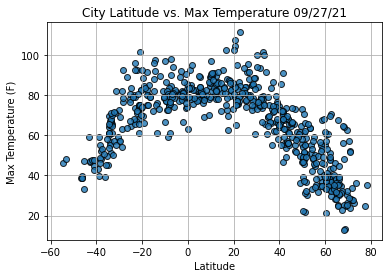

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

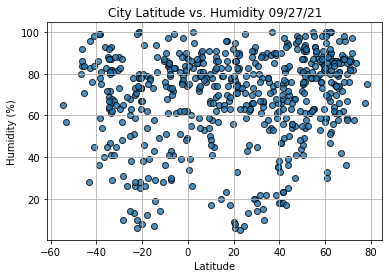

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

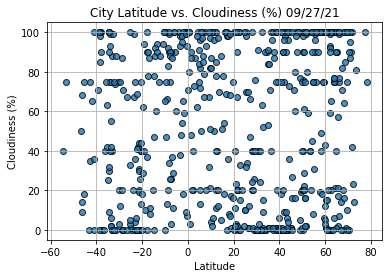

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

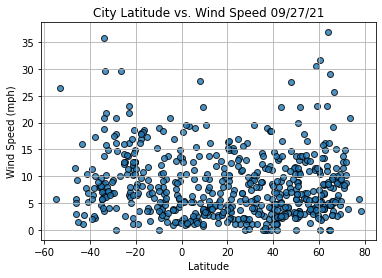

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2021-09-27 14:41:54,32.6667,-17.1000,79.72,66,9,5.10
1,Nikolskoye,RU,2021-09-27 14:41:25,59.7035,30.7861,55.29,81,12,5.26
3,Qaanaaq,GL,2021-09-27 14:41:58,77.4840,-69.3632,24.73,66,100,5.70
5,Upernavik,GL,2021-09-27 14:41:20,72.7868,-56.1549,26.33,58,14,3.85
6,Vardo,NO,2021-09-27 14:41:53,70.3705,31.1107,56.95,76,0,12.66


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

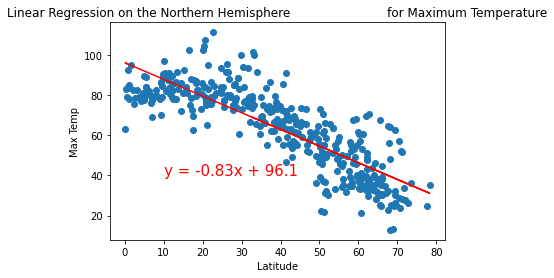

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


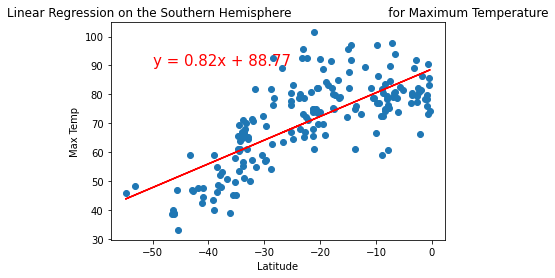

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

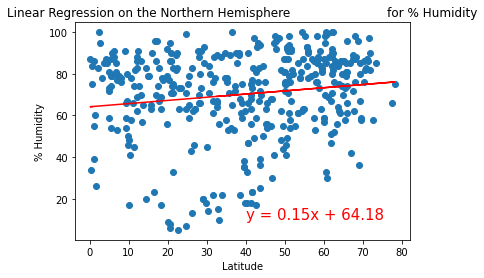

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

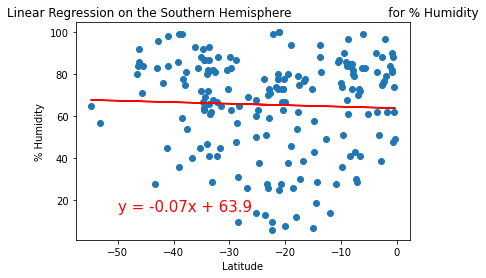

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

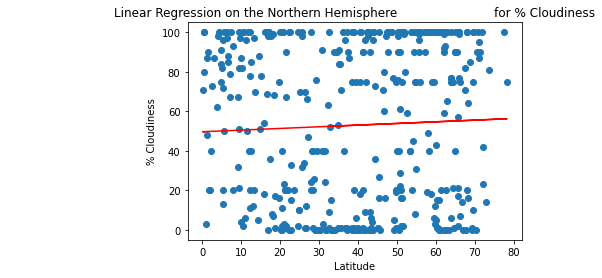

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

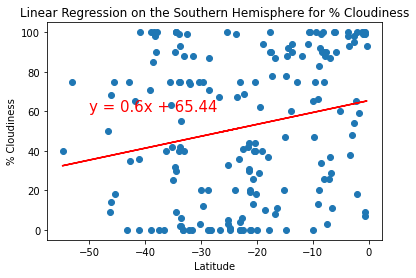

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

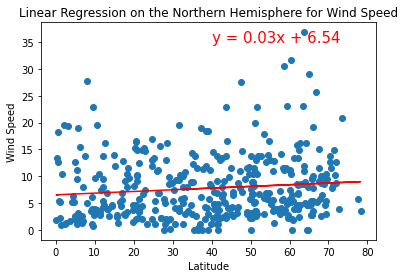

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

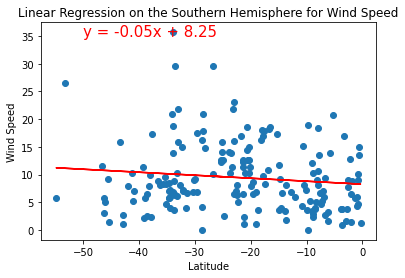

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))